![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Non-Linear Regression

# Polynomial Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


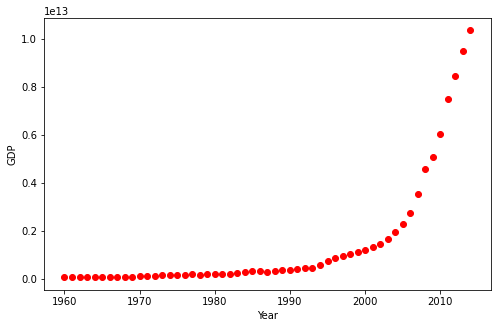

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Ma'lumotlarni ajratib olamiz va Normalizasiya qilamiz

In [ ]:
X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
yhat = model.predict(X)

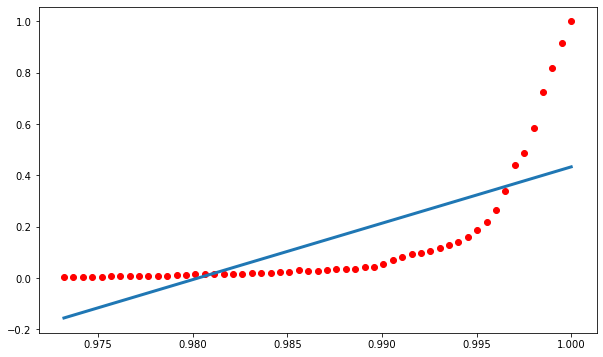

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=3.0, label='fit')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.12657979406214762


In [ ]:
X[0]

array([0.97318769])

## Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
model.fit(X_poly, y)

LinearRegression()

In [ ]:
yhat = model.predict(X_poly)

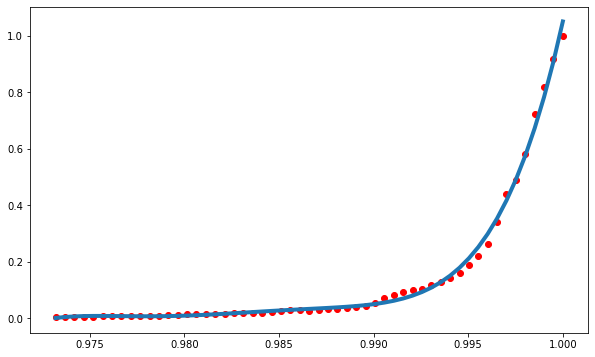

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=4.0, label='fit')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.009253885059542636


## `curve_fit`
'curve_fit' yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin.

Misol uchun, yuqoridagi ma'lumotlar Logistic regression funksiyasi yordamida aniqroq bashorat qilinishi mumkin.

# $$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

Keling, logisti regression funksiyasini yozib olamiz:

In [ ]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517109968472
beta2=0.9972071272536187


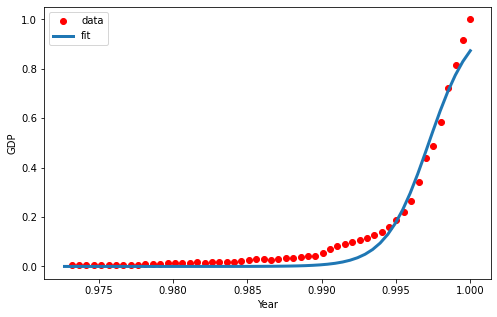

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.030498418832325392
